In [502]:
from qiskit import QuantumCircuit, transpile
import numpy as np
import re

In [503]:
# Target state.
Target_state = '001'

In [504]:
U = np.matrix([[1,0,0,0,0,0,0,0],
               [0,-1,0,0,0,0,0,0],
               [0,0,1,0,0,0,0,0],
               [0,0,0,1,0,0,0,0],
               [0,0,0,0,1,0,0,0],
               [0,0,0,0,0,1,0,0],
               [0,0,0,0,0,0,1,0],
               [0,0,0,0,0,0,0,1]])
#U = np.matrix([[1,0,0,0],
               #[0,-1,0,0],
               #[0,0,1,0],
               #[0,0,0,1]])

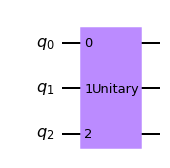

In [505]:
# Extracting the number of qubits.
n = 3

qc = QuantumCircuit(n)
qc.unitary(U,[0,1,2])
qc.draw('mpl')

In [506]:
trans_qc = transpile(qc, basis_gates = ['cx','u3'])

In [507]:
trans_qc[3][1]

[Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 0)]

In [508]:
def Gate(Gate_Number):  
     #trans_qc(gate number, the second list has qubit position, two is the qubit)
    if str(trans_qc[Gate_Number][0]).split(',')[0][-3:-1] == 'u3':
        return re.sub("\D", "", str(trans_qc[Gate_Number][1]).split(',')[2])
    else:
        Control_bit = re.sub("\D", '', str(trans_qc[Gate_Number][1][0]).split(',')[2])
        Target_bit = re.sub("\D", '', str(trans_qc[Gate_Number][1][1]).split(',')[2])
        return (Control_bit, Target_bit)
print(Gate(3))

('2', '0')


## Structure of the gate_object in qiskit.
(Instruction(name='u3', num_qubits=1, num_clbits=0, params=[angle, angle, angle]), [Qubit(QuantumRegister(Total number of qubits, 'q'), Position of $U_3$)], [])


In [513]:
def Return_Gate(f):
    
    def List_Angle(Gate_Number):
        # List the angle.
        if str(trans_qc[Gate_Number][0]).split(',')[0][-3:-1] == 'u3':
            l = []
            l.append(str(list(f)[Gate_Number]).split(',')[3])
            l.append(str(list(f)[Gate_Number]).split(',')[4])
            l.append(str(list(f)[Gate_Number]).split(',')[5])
    
            Angle = []
            for i in l:
                if re.findall("\d+\.\d+",i) == []:
                    Angle.append(0.0)
                else:
                    Angle.append(float(re.findall("\d+\.\d+",i)[0]))
            return Angle
        
    #the function return the qubit if the gate u3 and the control and target bit if the gate is cx.    
    def Qubit(Gate_Number):  
     #trans_qc(gate number, the second list has qubit position, two is the qubit)
     #if the gate is u3 angle is printed.
        if str(trans_qc[Gate_Number][0]).split(',')[0][-3:-1] == 'u3':
            
            # re.sub return the digit out a string mixed of alphabet and digit.
            return re.sub("\D", "", str(trans_qc[Gate_Number][1]).split(',')[2])
        # if the gate is cx the control and target bit is printed.
        else:
            Control_bit = re.sub("\D", '', str(trans_qc[Gate_Number][1][0]).split(',')[2])
            Target_bit = re.sub("\D", '', str(trans_qc[Gate_Number][1][1]).split(',')[2])
            return (Control_bit, Target_bit)


    for i in range(len(f)):
        if str(trans_qc[i][0]).split(',')[0][-3:-1] == 'u3':
            print('Gate =',str(trans_qc[i][0]).split(',')[0][-3:-1],
                  ' Qubit =', Qubit(i),', Angle =', List_Angle(i))
        else:
            print('Gate =',str(trans_qc[i][0]).split(',')[0][-3:-1],
                  ' Control Bit =', Qubit(i)[0], ', Target bit =', Qubit(i)[1])            
        #l.append([str(trans_qc[i][0]).split(',')[0][-3:-1], List_Angle(i), Qubit(i)])  
print(Return_Gate(trans_qc))


Gate = u3  Qubit = 0 , Angle = [0.0, 0.0, 0.785398163397448]
Gate = cx  Control Bit = 1 , Target bit = 0
Gate = u3  Qubit = 0 , Angle = [0.0, 0.0, 0.785398163397448]
Gate = cx  Control Bit = 2 , Target bit = 0
Gate = u3  Qubit = 0 , Angle = [0.0, 0.0, 0.785398163397448]
Gate = cx  Control Bit = 1 , Target bit = 0
Gate = u3  Qubit = 0 , Angle = [0.0, 0.0, 0.785398163397448]
Gate = u3  Qubit = 1 , Angle = [0.0, 0.0, 0.785398163397448]
Gate = cx  Control Bit = 2 , Target bit = 0
Gate = cx  Control Bit = 2 , Target bit = 1
Gate = u3  Qubit = 1 , Angle = [0.0, 0.0, 0.785398163397448]
Gate = cx  Control Bit = 2 , Target bit = 1
Gate = u3  Qubit = 2 , Angle = [0.0, 0.0, 0.785398163397448]
None


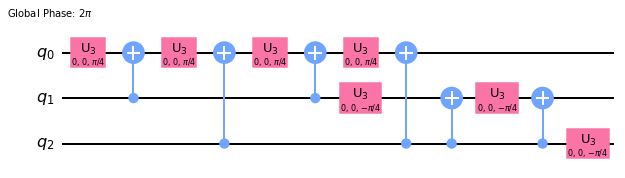

In [510]:
trans_qc.draw('mpl')